# La roue des émotions

In [58]:
import pandas as pd
import string

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams

import copy
from collections import Counter

In [2]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r'C:\Users\straw\Desktop\AIS\ProjectPool 2\Roue-des-emotions\Data\emotions_final.csv', sep=',')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


### Classes du dataset

In [35]:
S = df['Emotion'].value_counts()
S

joy         7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

#### Countplot

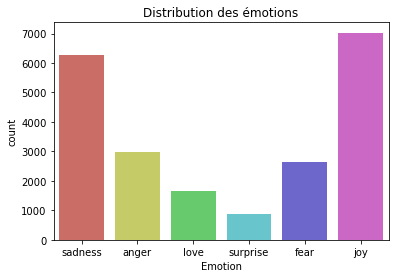

In [5]:
sns.countplot(x='Emotion', data=df, palette='hls')
plt.title('Distribution des émotions dans le dataset')
plt.show()

#### Piechart

In [33]:
fig = px.pie(S, values=S.values, names=S.index, title='Distribution des émotions dans le dataset')
fig.show()

### Normalisation

In [36]:
lowers = []
for i in range(0, df.shape[0]):
    lowers.append(df['Text'][i].lower())

In [37]:
df['Text'] = lowers
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 melissa stared at her friend in dism
21455    successive state elections have seen the gover...
21456                 vincent was irritated but not dismay
21457    kendall-hume turned back to face the dismayed ...
21458                      i am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

### Tokénization

In [38]:
df['Text'] = df['Text'].apply(word_tokenize)
df['Text']

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
21454         [melissa, stared, at, her, friend, in, dism]
21455    [successive, state, elections, have, seen, the...
21456          [vincent, was, irritated, but, not, dismay]
21457    [kendall-hume, turned, back, to, face, the, di...
21458              [i, am, dismayed, ,, but, not, surpris]
Name: Text, Length: 21459, dtype: object

### Suppression des stop words

In [39]:
stopW = stopwords.words('english')
stopW.extend(list(string.punctuation))

In [40]:
def remove_stopwords(sent):
    tokens_without_stopW = [word for word in sent if word not in stopW]
    return tokens_without_stopW

In [41]:
df['Text'] = df['Text'].apply(lambda sent: remove_stopwords(sent))

### Stemming et Lemmatization

In [42]:
wnl = WordNetLemmatizer()

In [43]:
def lemmatize(sent, join=True):
    tokens = [wnl.lemmatize(wnl.lemmatize(wnl.lemmatize(w,'v'),'n'),'a') for w in sent]
    if join:
        return ' '.join(tokens)
    else:
        return tokens

In [44]:
df_explo = copy.deepcopy(df)

In [45]:
df['Text'] = df['Text'].apply(lambda sent: lemmatize(sent))

In [46]:
df_explo['Text'] = df_explo['Text'].apply(lambda sent: lemmatize(sent, join=False))

In [47]:
df_explo['Text']

0                                 [didnt, feel, humiliate]
1        [go, feel, hopeless, damn, hopeful, around, so...
2            [im, grab, minute, post, feel, greedy, wrong]
3        [ever, feel, nostalgic, fireplace, know, still...
4                                          [feel, grouchy]
                               ...                        
21454                        [melissa, star, friend, dism]
21455    [successive, state, election, see, govern, par...
21456                          [vincent, irritate, dismay]
21457       [kendall-hume, turn, back, face, dismay, coup]
21458                                    [dismay, surpris]
Name: Text, Length: 21459, dtype: object

### Exploration des données

In [48]:
df_explo['Length'] = df_explo['Text'].apply(len)
df_explo

,Text,Emotion,Length
0,"[didnt, feel, humiliate]",sadness,3
1,"[go, feel, hopeless, damn, hopeful, around, so...",sadness,9
2,"[im, grab, minute, post, feel, greedy, wrong]",anger,7
3,"[ever, feel, nostalgic, fireplace, know, still...",love,7
4,"[feel, grouchy]",anger,2
...,...,...,...
21454,"[melissa, star, friend, dism]",fear,4
21455,"[successive, state, election, see, govern, par...",fear,9
21456,"[vincent, irritate, dismay]",fear,3
21457,"[kendall-hume, turn, back, face, dismay, coup]",fear,6


### Statistiques sur les tailles des documents

In [49]:
df_explo['Length'].describe()

count    21459.000000
mean         9.327275
std          5.161167
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         35.000000
Name: Length, dtype: float64

### Distribution de la taille des documents après suppression des stopwords

In [50]:
trace1 = go.Histogram(
    x = df_explo['Length'],
    text = df_explo.Emotion,
    opacity=0.5,
)

data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Distribution de la taille des documents après la suppression des stopwords',
                   xaxis=dict(title='Taille du document'),
                   yaxis=dict( title='Fréquence'),
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Word Cloud

In [52]:
texts = []
for i in range(0, df_explo.shape[0]):
    texts.append(df_explo['Text'][i])
words = [item for sublist in texts for item in sublist]

In [55]:
count_of_words = Counter(words)
df_words_count = pd.DataFrame(list(count_of_words.items()),columns = ['Word','Count'])

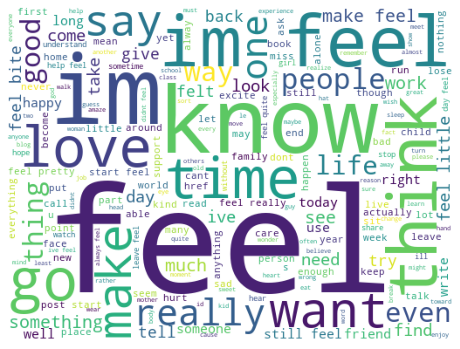

In [56]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                        background_color='white',
                        width=512,
                        height=384
                        ).generate(" ".join(words))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

In [57]:
tokens = word_tokenize('The girls wanted to play with their parents')
bigrams = ngrams(tokens, 2)

for words in bigrams:
    print(words)

('The', 'girls')
('girls', 'wanted')
('wanted', 'to')
('to', 'play')
('play', 'with')
('with', 'their')
('their', 'parents')


### Vectorisation des mots du dataset

In [60]:
vect = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,2))

In [59]:
X_train, X_val, y_train, y_val = train_test_split(df.Text, df.Emotion, test_size=0.2, shuffle=True, stratify=df.Emotion)

In [64]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(17167,)
(4292,)
(17167,)
(4292,)


In [65]:
tfidf_mat_train = vect.fit_transform(X_train)

tfidf_mat_val = vect.fit_transform(X_val)

In [66]:
feature_names = vect.get_feature_names()

In [69]:
dense_train = tfidf_mat_train.todense()
denselist_train = dense_train.tolist()

MemoryError: 

In [68]:
dense = tfidf_mat.todense()

denselist = dense.tolist()

df2 = pd.DataFrame(denselist, columns=feature_names)

df2.head()

MemoryError: Unable to allocate 18.4 GiB for an array with shape (21459, 115135) and data type float64

In [1]:
import pandas as pd
import string

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams

import copy


import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

df = pd.read_csv(r'C:\Users\straw\Desktop\AIS\ProjectPool 2\Roue-des-emotions\Data\emotions_final.csv', sep=',')

lowers = []
for i in range(0, df.shape[0]):
    lowers.append(df['Text'][i].lower())
    
df['Text'] = lowers

df['Text'] = df['Text'].apply(word_tokenize)

stopW = stopwords.words('english')
stopW.extend(list(string.punctuation))

def remove_stopwords(sent):
    tokens_without_stopW = [word for word in sent if word not in stopW]
    return tokens_without_stopW

df['Text'] = df['Text'].apply(lambda sent: remove_stopwords(sent))

wnl = WordNetLemmatizer()

def lemmatize(sent, join=True):
    tokens = [wnl.lemmatize(wnl.lemmatize(wnl.lemmatize(w,'v'),'n'),'a') for w in sent]
    if join:
        return ' '.join(tokens)
    else:
        return tokens
    
df_explo = copy.deepcopy(df)

df['Text'] = df['Text'].apply(lambda sent: lemmatize(sent))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
vect = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,2))

tfidf_mat = vect.fit_transform(df.Text)

feature_names = vect.get_feature_names()

dense = tfidf_mat.todense()

In [3]:
denselist = dense.tolist()

MemoryError: 

### Classification avec BERTH

In [5]:
pip install -U sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.4-py3-none-any.whl size=114306 sha256=c8f1f88f145f0513fadd9f3b20739caa02bfb5976330d8b8b5cfbefc8c2622da
  Stored in directory: c:\users\keltarr\appdata\local\pip\cache\wheels\28\cb\ae\360fe121dc748add4fabecd46e78c31d1ea2402d341f97e2dc
  Created wheel for sacremoses: filename=sacremoses-0.0.44-py3-none-any.whl size=886084 sha256=e240c8736e06d284e881e9e3a8bdb99674b7fd516ac8a31a702b28126092285a
  Stored in directory: c:\users\keltarr\appdata\local\pip\cache\wheels\d6\17\75\f2ed13c472c4cecc14f003401bb45efadca64cc589d4bf3103
Successfully built sentence-transformers sacremoses
Note: you may need to restart the kernel to use updated packages.


In [24]:
size = 5000

In [25]:
y = df['Emotion'][:size]

In [6]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

  0%|          | 0.00/306M [00:00<?, ?B/s]

In [7]:
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [15]:
#Sentences are encoded by calling model.encode()
embeddings = model.encode(df['Text'][:size])

In [16]:
embeddings.shape

(5000, 768)

In [17]:
type(embeddings)

numpy.ndarray

In [19]:
import numpy as np

In [20]:
np.save('embeddings.npy', embeddings) # Save a numpy array in a .npy format

In [21]:
load_embedding = np.load('embeddings.npy') # load a numpy array from a .npy file

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, stratify=y,
                                                    test_size=0.20)

In [29]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=29529ee7d4fd54746e918797266a02afc155cecfecc1f32d7220972fb0966ae1
  Stored in directory: c:\users\keltarr\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Note: you may need to restart the kernel to use updated packages.Successfully built sklearn



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.66      0.14      0.23       134
        fear       0.70      0.12      0.20       117
         joy       0.56      0.88      0.69       340
        love       0.50      0.01      0.02        80
     sadness       0.53      0.76      0.62       289
    surprise       0.00      0.00      0.00        40

    accuracy                           0.55      1000
   macro avg       0.49      0.32      0.30      1000
weighted avg       0.55      0.55      0.47      1000



C:\Users\keltarr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\keltarr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\keltarr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
df['Emotion'].value_counts()

joy         7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64